In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mission 1 : Netfilx

넷플릭스 주식회사(영어: Netflix, Inc.)는 미국의 주문형 콘텐츠 서비스 제작 기업이다. 1997년 캘리포니아주 스콧츠 밸리에서 리드 해스팅스와 마크 랜돌프가 설립하였다. '넷플릭스(NETFLIX)'는 '인터넷(Net)'과 '영화(Flicks)'를 합성한 이름이다. 넷플릭스 회원들이 오리지널 시리즈, 다큐멘터리, 드라마 등 다채로운 콘텐츠를 향유하는 데 들이는 시간은 하루 평균 1억 2천 5백만 시간 이상이다. 넷플릭스의 모든 콘텐츠는 인터넷 연결이 가능한 모든 스크린에서 언제, 어디서나 광고나 약정 없이 즐길 수 있다. 대한민국에는 2016년 1월 7일에 진출하였다. 넷플릭스는 2019년 기준 190여개국 1억 5830만명의 회원을 두고 있다.[3] 시가총액 기준으로 세계 4위의 미디어 그룹이다.

넷플릭스는 한 달에 적게는 7.99달러만 내면 영화와 TV 프로그램과 같은 영상 콘텐츠를 맘껏 볼 수 있는 온라인 동영상 스트리밍 서비스다.


위키백과 - (원문 링크)
https://ko.wikipedia.org/w/index.php?title=%ED%8A%B9%EC%88%98:%EA%B2%80%EC%83%89&search=%EB%84%B7%ED%94%8C%EB%A6%AC%EC%8A%A4&ns0=1

In [194]:
nf = pd.read_csv('C:/Users/ysh/programmers/week3/netflix_titles.csv')

In [195]:
nf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [196]:
## Column의 데이터 type 확인하기

## type:object -> 파이썬의 모든 데이터는 객체(object) 형태로 추상화된다.
## 타입을 지정하지 않으면 object가 기본으로 설정된다.

nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [197]:
# 1925년의 작품부터 2021년까지 다양한 년도의 작품이 존재
# 2017~2018년도 사이의 굉장히 많은 작품이 나온것으로 추측할 수 있음

nf['release_year'].describe()

count    7787.000000
mean     2013.932580
std         8.757395
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

In [198]:
"""
null 값이 있는지 우선 확인이 필요하다.
기준 열로 사용할 country column에 총 507개의 null값이 확인되었다.
놀랍게도 제작한 감독의 누락된 정보가 가장 많았고 그 다음이 출연진의 정보이다. 감독과 배우가 누구인지는
서비스를 이용하는 사용자에게 중요한 내용은 아니라고 판단해서 일까.....

"""

nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Mandatory Part
#### 한국 작품은 총 얼마나 있는가?   // 183건
- country column을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [199]:
## country column 중 South Korea인 행만을 추출 후 sk 변수에 넣어 원본에 영향없이 별도로 조작을 한다.
## .info()를 이용해 null값과 총 데이터의 개수를 살펴볼 수 있다.

sk = nf[nf['country'] == 'South Korea']
sk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 27 to 7720
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       183 non-null    object
 1   type          183 non-null    object
 2   title         183 non-null    object
 3   director      44 non-null     object
 4   cast          180 non-null    object
 5   country       183 non-null    object
 6   date_added    183 non-null    object
 7   release_year  183 non-null    int64 
 8   rating        183 non-null    object
 9   duration      183 non-null    object
 10  listed_in     183 non-null    object
 11  description   183 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.6+ KB


In [200]:
## .value_counts()를 이용해도 데이터의 총 개수를 알 수 있다.
## Netflex 내 한국 작품은 총 183건이 존재한다.
sk['country'].value_counts()

South Korea    183
Name: country, dtype: int64

### Bonus Part
#### 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
- country column을 기준으로 한다.
- 단일 국가인 경우를 기준으로 결과를 구해보자.

In [201]:
"""
가장 많은 작품이 올라간 국가(단일 국가)는 어디이고, 얼마나 많은 작품이 있는가?

1. 앞서 데이터 탐색시 country column에서 null값이 확인되었다. 
  이 부분을 해결 후 진행해야 더 좋은 결과가 나올것 같다.

2. 아래 내용을 확인해보면 'United Kingdom, United States' 처럼 서비스 지역이 여러곳일 경우
  두 개 이상의 국가 정보가 들어가 있다. 단일 국가일 경우만 찾아야 되므로 이 부분 해결해야 한다.

"""

"\n가장 많은 작품이 올라간 국가(단일 국가)는 어디이고, 얼마나 많은 작품이 있는가?\n\n1. 앞서 데이터 탐색시 country column에서 null값이 확인되었다. \n  이 부분을 해결 후 진행해야 더 좋은 결과가 나올것 같다.\n\n2. 아래 내용을 확인해보면 'United Kingdom, United States' 처럼 서비스 지역이 여러곳일 경우\n  두 개 이상의 국가 정보가 들어가 있다. 단일 국가일 경우만 찾아야 되므로 이 부분 해결해야 한다.\n\n"

In [202]:
nf['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       nan, 'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, Unit

In [203]:
# 1. country column에 null값을 제거해 보자
# .dropna(subset=['country'],axis=0)을 통해 country의 결측된 값을 포함하고 있는 행이 삭제된 것을 확인할 수 있다.

nf = nf.dropna(subset=['country'], axis=0)

nf.isnull().sum()

show_id            0
type               0
title              0
director        2087
cast             622
country            0
date_added         9
release_year       0
rating             6
duration           0
listed_in          0
description        0
dtype: int64

In [204]:
"""
2. country column에 2개 이상의 국가 정보가 포함된 행을 제거해 보자
.str.contains(',')를 통해 Serise 형태의 True, False 값을 반환받습니다.
이때 ',' 쉼표가 들어가 있지 않은 데이터를 찾고자 하기 때문에 조건을 걸어 ','을 포함하지 않는
False 값만을 추출합니다.

아래 결과를 통해 정상적으로 추출된것을 확인할 수 있습니다.
"""

nf[nf['country'].str.contains(',') == False].head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [205]:
# 가장 많은 작품이 올라간 국가와 작품 수를 구해야하므로 국가별 즉 group by를 진행해야 하며
# 작품 수를 구해야하기 때문에 count()를 사용해 보겠습니다.

nf_max_country = nf[nf['country'].str.contains(',') == False]

In [206]:
'''
country column으로 그룹화 후 count()를 이용한다. 여기서 show_id 경우 고유 index로 여길 수 있는 특성으로
확인되어 show_id열을 기준으로 내림차순으로 정렬 후 상위 행 1개만 노출되도록 코딩하였다.
역시나 미국이 가장 많은 콘텐츠를 보유하고 있었다. 그 다음은 인도였다. 발리우드에서 많은 작품이 쏟아지고
있다는 말이 거짓은 아니였다.
'''

nf_max_country = nf_max_country.groupby(['country']).count()

In [207]:
nf_max_country.sort_values(by='show_id', ascending=False).head(2)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description
country,,,,,,,,,,,
United States,2555,2555,2555,1838,2251,2549,2555,2552,2555,2555,2555
India,923,923,923,848,894,923,923,923,923,923,923


# Mission 2 : 가즈아!

가상화폐(假想 貨幣, virtual currency 또는 virtual money)는 
지폐나 동전과 같은 실물이 없이 네트워크로 연결된 특정한 
가상공간(vitual community)에서 
전자적 형태로 사용되는 디지털 화폐 또는 전자화폐를 말한다.

암호화폐는 가상화폐의 일종이라고 볼 수도 있다. 
하지만 유럽 중앙은행이나 미국 재무부의 가상화폐 정의를 엄격하게 적용하면 가상화폐라고 부를 수 있는 
암호화폐는 거의 없게 된다. 

그래서 미국 재무부 금융범죄단속반(FinCEN)에서는 암호화폐를 가상화폐라고 부르지 않는다.

최근 대한민국에서는 가상자산으로 불리기도 한다.

In [208]:
bit = pd.read_csv('C:/Users/ysh/programmers/week3/BitCoin.csv')

In [209]:
bit.head(5)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [210]:
bit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1609 non-null   int64  
 1   Date        1609 non-null   object 
 2   Open        1609 non-null   float64
 3   High        1609 non-null   float64
 4   Low         1609 non-null   float64
 5   Close       1609 non-null   float64
 6   Volume      1609 non-null   float64
 7   Market Cap  1609 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 100.7+ KB


### 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 
### 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 이동평균(Moving Average)법은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

#### 시스템 트레이딩을 위한 데이터 사이언스 (파이썬 활용편) - 위키독스
https://wikidocs.net/3395

평균과 이동평균의 가장 큰 차이점은 시간이라는 개념입니다.

평균은 동일시점에서 산출되는 것이 흔한 반면, 이동평균은 동일 대상이지만 시점이 서로 상이해서 발생합니다.

본체는 동일하나 시점이 다릅니다.

- 단순이동평균(Simple Moving Average)
       일반적인 평균을 구하는 방법입니다.
       n1 , n2, n3 가 존재한다고 가정하면, (n1 + n2 + n3) / 3 입니다.
   
- 가중이동평균(Weighted Moving Average)
- 지수이동평균(Exponential Moving Average)

관련 내용을 읽어본 후 단순 이동 평균을 이용하기로 했습니다.

===================================================================

In [211]:
# .rolling(window=5).mean()을 이용하여 shift를 사용하지 않고도 쉽게 5일 기준 평균 값을 구합니다.
# 5일 동안에 평균값이 5일째 되는날 입력되기 때문에 가장 상단에 4일은 값이 없습니다.
# window의 사이즈에 따라 이동 범위를 자유롭게 설정할 수 있습니다.

bit['MA5'] = round(bit['Open'].rolling(window=5).mean(),1)

In [212]:
# 5일 이동평균 값을 'MA5'라는 속성을 만들어 bit DataFrame에 추가하였습니다.
bit.head(10)

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,MA5
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000,NaN
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000,NaN
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000,NaN
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000,NaN
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000,3822.1
5,5,2017-09-17,3606.28,3664.81,3445.64,3582.88,1.239150e+09,59757800000,3817.8
6,6,2017-09-16,3637.75,3808.84,3487.79,3625.04,1.818400e+09,60271600000,3765.1
7,7,2017-09-15,3166.30,3733.45,2946.62,3637.52,4.148070e+09,52453500000,3615.0
8,8,2017-09-14,3875.37,3920.60,3153.86,3154.95,2.716310e+09,64191600000,3575.4
9,9,2017-09-13,4131.98,4131.98,3789.92,3882.59,2.219410e+09,68432200000,3683.5


In [213]:
# 시간별 추세 그래프를 그리기 위해서는 날짜가 x값으로 들어가야 합니다.
# 하지만 Date속성은 현재 object로 되어 있어 이를 적절한 타입으로 변경해 주어야 합니다.
# 마지막으로 2016.6 ~ 2017.6월 까지에 데이터만을 추출합니다.

bit['Date'] = pd.to_datetime(bit['Date'])

bit_ma5 = bit.query('"2016-06-01" <= Date <= "2017-06-30"')

In [214]:
bit_ma5

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,MA5
16,16,2017-06-09,4376.59,4617.25,4376.59,4597.12,2.172100e+09,72418700000,4406.0
17,17,2017-05-09,4228.29,4427.84,3998.11,4376.53,2.697970e+09,69954400000,4405.8
18,18,2017-04-09,4591.63,4591.63,4108.40,4236.31,2.987330e+09,75955500000,4478.2
19,19,2017-03-09,4585.27,4714.08,4417.59,4582.96,1.933190e+09,75841700000,4474.2
20,20,2017-02-09,4901.42,4975.04,4469.24,4578.77,2.722140e+09,81060600000,4536.6
...,...,...,...,...,...,...,...,...,...
621,621,2016-10-01,448.24,448.31,440.35,447.99,3.599590e+07,6752210000,442.4
622,622,2016-09-01,453.38,454.64,446.89,447.61,3.227800e+07,6828000000,446.6
623,623,2016-08-01,457.54,462.93,447.94,453.23,5.699300e+07,6888600000,451.2
624,624,2016-07-01,430.01,458.77,429.08,458.05,8.756220e+07,6472580000,447.6


In [215]:
# 불필요한 열값을 제외하고 필요한 열값만을 가져와 보자
bit_ma5 = bit_ma5[['Date', 'Open', 'MA5']].sort_values(by = 'Date')

In [216]:
bit_ma5.head(10)

,Date,Open,MA5
625,2016-06-01,431.86,444.2
594,2016-06-02,386.59,377.9
565,2016-06-03,400.52,410.3
534,2016-06-04,424.28,422.2
504,2016-06-05,447.94,456.9
473,2016-06-06,574.60,579.1
443,2016-06-07,670.42,661.2
412,2016-06-08,575.03,586.8
381,2016-06-09,606.51,616.2
351,2016-06-10,612.47,615.7


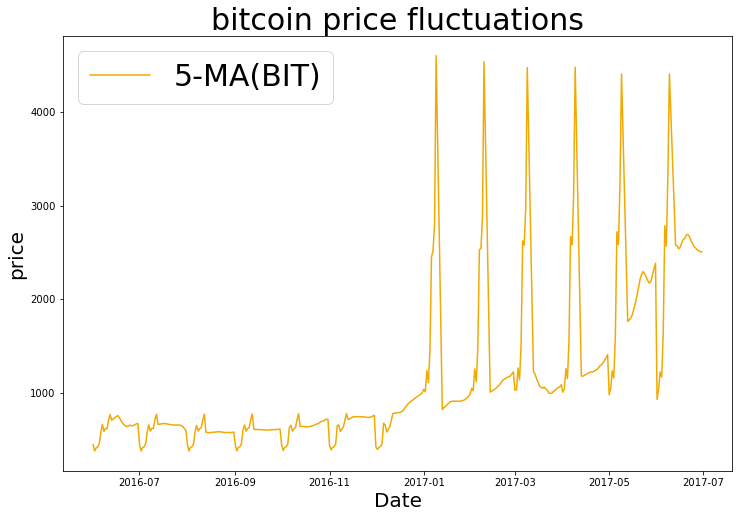

In [217]:
# 이제 그래프를 그려보자

plt.figure(figsize =(12, 8))
plt.plot(bit_ma5['Date'], bit_ma5['MA5'], label = '5-MA(BIT)', color='#f2a900')

plt.title("bitcoin price fluctuations", fontsize = 30)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("price", fontsize = 20)
plt.legend(loc="upper left", fontsize=30)

plt.show()

### Bonus Part
#### 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 
#### 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다..

In [218]:
eth = pd.read_csv('C:/Users/ysh/programmers/week3/ETH_day')

In [219]:
# 위에서 진행한 내용을 동일하게 진행하기 때문에 별도의 설명없이 진행합니다.
eth.head(5)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [220]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1438 non-null   object 
 1   Symbol      1438 non-null   object 
 2   Open        1438 non-null   float64
 3   High        1438 non-null   float64
 4   Low         1438 non-null   float64
 5   Close       1438 non-null   float64
 6   Volume ETH  1438 non-null   float64
 7   Volume USD  1438 non-null   float64
dtypes: float64(6), object(2)
memory usage: 90.0+ KB


In [221]:
eth.isnull().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume ETH    0
Volume USD    0
dtype: int64

In [222]:
eth['MA5'] = round(eth['Open'].rolling(window=5).mean(),1)

In [223]:
eth['Date'] = pd.to_datetime(eth['Date'])

In [224]:
eth = eth.query('"2016-06-01" <= Date <= "2017-06-30"')
eth = eth[['Date','Open','MA5']].sort_values('Date')

In [225]:
eth.head(10)

,Date,Open,MA5
1414,2016-06-01,14.18,14.0
1413,2016-06-02,13.95,13.9
1412,2016-06-03,13.90,14.0
1411,2016-06-04,14.02,14.1
1410,2016-06-05,13.86,14.2
1409,2016-06-06,13.91,14.3
1408,2016-06-07,14.16,14.3
1407,2016-06-08,14.50,14.3
1406,2016-06-09,14.51,14.6
1405,2016-06-10,14.47,15.2


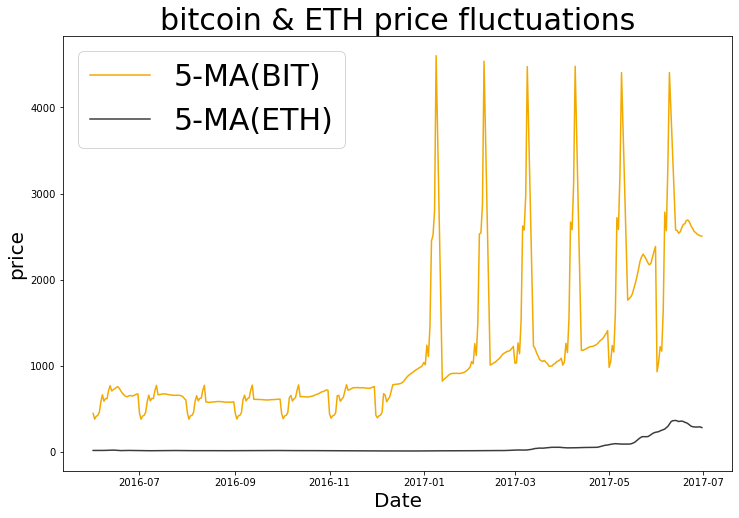

In [226]:
# 이제 그래프를 그려보자

plt.figure(figsize =(12, 8))
plt.plot(bit_ma5['Date'], bit_ma5['MA5'], label = '5-MA(BIT)', color='#f2a900')
plt.plot(eth['Date'], eth['MA5'], label = '5-MA(ETH)', color='#3c3c3d')

plt.title("bitcoin & ETH price fluctuations", fontsize = 30)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("price", fontsize = 20)
plt.legend(loc="upper left", fontsize=30)

plt.show()

## 위 그래프를 통해 알 수 있는 점

- 비트코인의 가격이 오르다가 크게 떨어지는 패턴을 보임
- 비트코인의 가격이 비싸 상대적으로 주어진 이더리움의 값으로는 가격의 변동 비교가 쉽지 않음
  (데이터 스케일링이 필요하지 않을까란 생각이 든다.)
- 이더리움은 가격 변동이 크지 않으며 지속적으로 가격이 상승하고 있음 (최근 400만원까지 급 상승!! ㅠ ㅠ)
- 코인으로 돈을 벌려면 장기간 존버를 하거나(이더리움), 상승 시그널을 잘 살펴보고 이미 너무 고점일 경우 큰 폭의 하락장을 기다려야 한다.
- 분석한 내용에는 포함되지 않았지만, 언론의 영향을 꽤나 많이 받는 유형이다. 어떤 직위에 있는 사람이 어떤 단어를 썼을때
  가격이 크게 변동하는지에 대해 분석하면 더 큰 결과를 얻을 수 있을 것 같다.